# Семинар 01 - Первичный анализ данных, векторизация, пайплайны

<a id="Content"></a>
# Содержание
1. [NumPy](#1)
    - [Установка](#1.0)
    - [Вводная часть](#1.1)
    - [Базовые операции над массивами](#1.2)
    - [Векторизация](#1.3)
    - [Случайные величины](#1.4)
2. [Pandas](#2)
    - [Установка](#2.0)
    - [Series](#2.1)
    - [DataFrame](#2.2)
    - [Визуализация](#2.3)

<a id="1"></a>
# 1 NumPy

**NumPy** — великолепная библиотека Python для матричных вычислений. Она позволяет [легко] работать с матрицами, массивами, математикой и т.п. Кроме того, она позволяет производить векторные операции, которые **гораздо** быстрее стандартных.

**Полезные ссылки:**

 - [numpy](http://www.numpy.org)
 - [numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/)
 - [100 numpy exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/)

In [90]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot

# Показывать несколько выводов в одной клетке. Улучшает читаемость и удобство понимания
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<a id="1.0"></a>
## 1.0. Установка

In [30]:
pip install numpy==1.26.*

Note: you may need to restart the kernel to use updated packages.


<a id="1.1"></a>
## 1.1. Вводная часть

### 1.1.0. Размерность

Основной тип  — [numpy.ndarray](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.array.html). 
Каждый `ndarray` имеет оси.  
<img src=data/numpy_array_axes.png></img>

In [264]:
vec = np.array([1, 2, 3])
vec.ndim  # количество осей
vec.shape  # размерность массива
type(vec) # тип - np.ndarray, но создается с помощью функции np.array() ( не np.ndarray() )

1

(3,)

numpy.ndarray

In [265]:
mat = np.array([[1, 2, 3], [4, 5, 6]])
mat.ndim  # количество осей
mat.shape  # размерность массива

2

(2, 3)

### 1.1.1. Типы данных

В Numpy есть разные встроенные типы данных, с которыми мы будем встречаться, аналогичные C++.  
<br>
<img src=data/numpy_dtypes.png></img>

In [23]:
mat = np.array([[1, 2, 3], [4, 5, 6]])
mat.dtype  # Тип данных в массиве
mat.nbytes  # Занимаемое в памяти место 
mat

dtype('int32')

24

array([[1, 2, 3],
       [4, 5, 6]])

In [24]:
mat = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.float64)  # Явно указываем тип данных в массиве
mat.dtype  # Тип данных в массиве
mat.nbytes  # Занимаемое в памяти место 
mat

dtype('float64')

48

array([[1., 2., 3.],
       [4., 5., 6.]])

### 1.1.2 Создание векторов и матриц 

In [25]:
np.zeros((3,))  # Создание матрицы из нулей 
np.zeros((3,), dtype=bool)
np.zeros((3,), dtype=np.longfloat)

array([0., 0., 0.])

array([False, False, False])

array([0., 0., 0.], dtype=float64)

In [26]:
np.ones((3, 4))  # Создание матрицы из единиц

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [27]:
np.identity(3)  # Создание единичной матрицы

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [28]:
np.arange(2, 20, 3)  # Создание вектора с указанием границ и шага (как range)
np.linspace(1, 10, 4)  # Создание вектора с указанием границ и количества значений между ними (границы включительно)

array([ 2,  5,  8, 11, 14, 17])

array([ 1.,  4.,  7., 10.])

### 1.1.3. Изменение формы массива

Изменение формы происходит при помощи функции _np.reshape_
<br>
<img src=data/numpy_reshape.png> </img>

In [29]:
A = np.linspace(1, 6, 6)
A
A.reshape(2, 3)  # Изменение формы 

array([1., 2., 3., 4., 5., 6.])

array([[1., 2., 3.],
       [4., 5., 6.]])

In [30]:
C = A.reshape(3, -1)  # Автоматический подбор размеров матрицы
C

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

Или при помощи транспонирования

In [31]:
C.T  
C.transpose()

array([[1., 3., 5.],
       [2., 4., 6.]])

array([[1., 3., 5.],
       [2., 4., 6.]])

<a id="1.2"></a>
## 1.2. Базовые операции над массивами

### 1.2.0. Операции с массивами одинаковой размерности

Сложение, умножение и другие математические операции производятся поэлементно:
$$c_i = a_i + b_i$$

In [32]:
A = np.arange(9).reshape(3, 3)
B = np.arange(8, 17).reshape(3, 3)
A
B

C = A + B
C

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[ 8,  9, 10],
       [11, 12, 13],
       [14, 15, 16]])

array([[ 8, 10, 12],
       [14, 16, 18],
       [20, 22, 24]])

In [33]:
A = np.arange(9).reshape(3, 3)
B = np.arange(8, 17).reshape(3, 3)
A
B
A * B

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[ 8,  9, 10],
       [11, 12, 13],
       [14, 15, 16]])

array([[  0,   9,  20],
       [ 33,  48,  65],
       [ 84, 105, 128]])

### 1.2.1 Операции с разными размерностями

По возможности происходит так, как показано на картинке.
<img src=data/numpy_adding.jpg> </img>

In [34]:
A = np.arange(0, 31, 10).reshape(-1, 1)
B = np.arange(1, 4)
A
B
A + B

array([[ 0],
       [10],
       [20],
       [30]])

array([1, 2, 3])

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [35]:
A = np.arange(9).reshape(3, 3)
A
A + 5

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[ 5,  6,  7],
       [ 8,  9, 10],
       [11, 12, 13]])

In [36]:
D = np.arange(9, dtype=np.int8).reshape(3, 3)
D
D * 2
D * 20

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int8)

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16]], dtype=int8)

array([[   0,   20,   40],
       [  60,   80,  100],
       [ 120, -116,  -96]], dtype=int8)

In [37]:
A = np.arange(9).reshape(3, 3)
B = np.arange(1, 4)
A
B
A + B

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([1, 2, 3])

array([[ 1,  3,  5],
       [ 4,  6,  8],
       [ 7,  9, 11]])

### 1.2.2. Матричное умножение

In [38]:
A = np.arange(9).reshape(3, 3)
B = np.arange(8, 17).reshape(3, 3)
A
B

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[ 8,  9, 10],
       [11, 12, 13],
       [14, 15, 16]])

In [39]:
A.dot(B)
A@B

array([[ 39,  42,  45],
       [138, 150, 162],
       [237, 258, 279]])

array([[ 39,  42,  45],
       [138, 150, 162],
       [237, 258, 279]])

### 1.2.3 Индексация и срез

In [40]:
A = np.arange(9).reshape(3, 3)
A[:]
A[:, 1]
A[:, 1:3]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([1, 4, 7])

array([[1, 2],
       [4, 5],
       [7, 8]])

In [41]:
A = np.arange(81).reshape(9, -1)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [42]:
A[:, 2:6]

array([[ 2,  3,  4,  5],
       [11, 12, 13, 14],
       [20, 21, 22, 23],
       [29, 30, 31, 32],
       [38, 39, 40, 41],
       [47, 48, 49, 50],
       [56, 57, 58, 59],
       [65, 66, 67, 68],
       [74, 75, 76, 77]])

In [43]:
A[:, 2:6:3] 

array([[ 2,  5],
       [11, 14],
       [20, 23],
       [29, 32],
       [38, 41],
       [47, 50],
       [56, 59],
       [65, 68],
       [74, 77]])

In [44]:
# Маски
A % 3
A % 3 == 0
A[A % 3 == 0]

array([[0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2]], dtype=int32)

array([[ True, False, False,  True, False, False,  True, False, False],
       [ True, False, False,  True, False, False,  True, False, False],
       [ True, False, False,  True, False, False,  True, False, False],
       [ True, False, False,  True, False, False,  True, False, False],
       [ True, False, False,  True, False, False,  True, False, False],
       [ True, False, False,  True, False, False,  True, False, False],
       [ True, False, False,  True, False, False,  True, False, False],
       [ True, False, False,  True, False, False,  True, False, False],
       [ True, False, False,  True, False, False,  True, False, False]])

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
       51, 54, 57, 60, 63, 66, 69, 72, 75, 78])

### 1.2.4. Остальное

Рассмотрим остальные приятные операции, такие как:
- минимум
- максимум
- сумма
- среднее
- стд
- поэлементые математические операции

In [45]:
A = np.arange(9).reshape(3, 3)
B = np.arange(8, 17).reshape(3, 3)
D = A@B
D
D.max(axis=1)
D.min(axis=0)

array([[ 39,  42,  45],
       [138, 150, 162],
       [237, 258, 279]])

array([ 45, 162, 279])

array([39, 42, 45])

In [46]:
D.sum()
D.sum(axis=0)
np.sum(D, axis=0)

1350

array([414, 450, 486])

array([414, 450, 486])

In [47]:
D.mean()
D.std()

150.0

88.92693630166283

In [48]:
A = np.arange(9).reshape(3, 3)
A
np.sin(A)
np.log(A)
np.exp2(A)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

array([[ 0.        ,  0.84147098,  0.90929743],
       [ 0.14112001, -0.7568025 , -0.95892427],
       [-0.2794155 ,  0.6569866 ,  0.98935825]])

C:\Users\kitro\AppData\Local\Temp\ipykernel_24744\2077385271.py:4: RuntimeWarning: divide by zero encountered in log
  np.log(A)


array([[      -inf, 0.        , 0.69314718],
       [1.09861229, 1.38629436, 1.60943791],
       [1.79175947, 1.94591015, 2.07944154]])

array([[  1.,   2.,   4.],
       [  8.,  16.,  32.],
       [ 64., 128., 256.]])

<a id="1.3"></a>
## 1.3. Векторизация

### 1.3.0. Математические операции с массивами

In [14]:
for p in range(5,10):
    n = int(10**p)
    l = list(range(n))
    print(f"\n{n}\n**list")
    %time for i in range(n): l[i] += 17
    print("**create_ndarray")
    %time arr = np.array(l)
    print("**add to ndarray")
    %time arr += 17


100000
**list
CPU times: total: 0 ns
Wall time: 6.49 ms
**create_ndarray
CPU times: total: 0 ns
Wall time: 14.3 ms
**add to ndarray
CPU times: total: 0 ns
Wall time: 1 ms

1000000
**list
CPU times: total: 15.6 ms
Wall time: 73 ms
**create_ndarray
CPU times: total: 0 ns
Wall time: 24.5 ms
**add to ndarray
CPU times: total: 0 ns
Wall time: 0 ns

10000000
**list
CPU times: total: 156 ms
Wall time: 729 ms
**create_ndarray
CPU times: total: 46.9 ms
Wall time: 259 ms
**add to ndarray
CPU times: total: 0 ns
Wall time: 3 ms

100000000
**list
CPU times: total: 2.09 s
Wall time: 7.87 s
**create_ndarray
CPU times: total: 891 ms
Wall time: 3.01 s
**add to ndarray
CPU times: total: 15.6 ms
Wall time: 38.6 ms

1000000000
**list
CPU times: total: 15 s
Wall time: 1min 14s
**create_ndarray
CPU times: total: 4.45 s
Wall time: 26.2 s
**add to ndarray
CPU times: total: 156 ms
Wall time: 292 ms


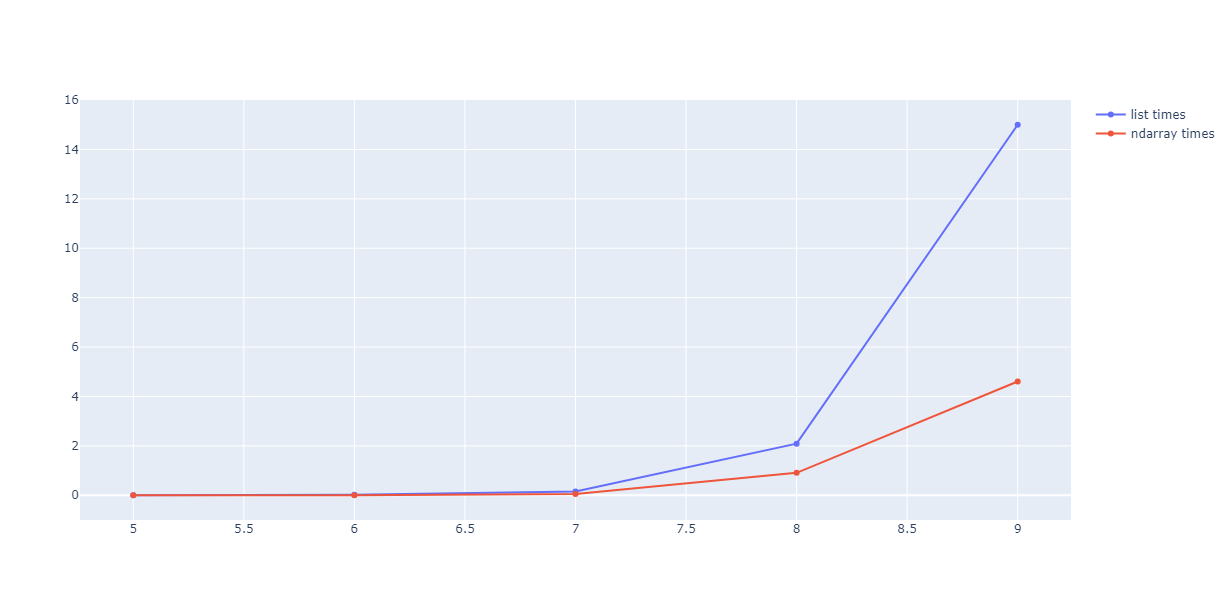

In [30]:
x = [p for p in range(5,10)]
y_list = [0, 0.0156, 0.156, 2.09, 15]
y_ndarray = [0, 0, 0.0469, 0.9066, 4.606]
trace1 = go.Scatter(x=x, y=y_list, name = "list times")
trace2 = go.Scatter(x=x, y=y_ndarray, name = "ndarray times")

fig = make_subplots()
_ = fig.add_trace(trace1)
_ = fig.add_trace(trace2)

_ = fig['layout'].update(height = 600, width = 800)
iplot(fig)

### 1.3.1. Векторизация своих функций

Выдержка из официальной [документации](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html) по np.vectorize():
> The vectorize function is provided primarily for convenience, not for performance. The implementation is essentially a "for" loop.

Таким образом, всё что могло быть ускорено - уже ускорено если использовать встроенные функции и типы numpy. В остальном можно только лишь обеспечивать удобство и совместимость.  
Мораль - **используйте встроенные функции и типы numpy**.

In [19]:
def find_root(x):
    if x < 0:
        return 0
    else:
        return x ** 0.5
    
# vectorize() чтобы векторизовать функцию find_root()
vectorized_root = np.vectorize(find_root)


In [24]:
l = [-1, 0, 1, 2, 3.5, 4.5] 
arr = np.array(l)
arr
arr.dtype

# подаём массив векторизованной функции
vectorized_root(l)
vectorized_root(arr)

array([-1. ,  0. ,  1. ,  2. ,  3.5,  4.5])

dtype('float64')

array([0, 0, 1, 1, 1, 2])

array([0, 0, 1, 1, 1, 2])

In [12]:
for p in range(4,9):
    n = int(10**p)
    l = list(range(n))
    print(f"\n{n}")

    print("**list no vectorize")
    %time for i in range(n): find_root(l[i])
    print("**list with vectorize")
    %time res = vectorized_root(l)
        
    print("**create_ndarray")
    %time arr = np.array(l)
    print("**ndarray vectorized")
    %time res = vectorized_root(arr)

del l
del arr
del res


10000
**list no vectorize
CPU times: total: 0 ns
Wall time: 3 ms
**list with vectorize
CPU times: total: 0 ns
Wall time: 6 ms
**create_ndarray
CPU times: total: 0 ns
Wall time: 2.26 ms
**ndarray vectorized
CPU times: total: 0 ns
Wall time: 2.05 ms

100000
**list no vectorize
CPU times: total: 15.6 ms
Wall time: 22.2 ms
**list with vectorize
CPU times: total: 0 ns
Wall time: 24.8 ms
**create_ndarray
CPU times: total: 0 ns
Wall time: 3.96 ms
**ndarray vectorized
CPU times: total: 15.6 ms
Wall time: 22.5 ms

1000000
**list no vectorize
CPU times: total: 31.2 ms
Wall time: 166 ms
**list with vectorize
CPU times: total: 0 ns
Wall time: 167 ms
**create_ndarray
CPU times: total: 0 ns
Wall time: 24.9 ms
**ndarray vectorized
CPU times: total: 31.2 ms
Wall time: 160 ms

10000000
**list no vectorize
CPU times: total: 156 ms
Wall time: 1.49 s
**list with vectorize
CPU times: total: 203 ms
Wall time: 1.8 s
**create_ndarray
CPU times: total: 31.2 ms
Wall time: 248 ms
**ndarray vectorized
CPU times:

In [13]:
# то же самое только через декоратор
@np.vectorize(otypes=[float])
def find_root_float(x):
    if x < 0:
        return 0
    else:
        return x ** 0.5

In [17]:
arr = np.arange(10)
find_root_float(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

### 1.3.2. Задание 1

Так выглядит формула l2 расстояния между двумя картинками.  
<img src="data/l2_distance_images.png"></img>  
 
Ваша задача дописать функции подсчёта расстояние наивно (без *numpy*) и векторизованно (через *numpy*), сравнить результаты.

In [4]:
import matplotlib.pyplot as plt

In [27]:
# загружаем два изображения
image1 = plt.imread("data/ml_image1.jpg").astype(np.int32)
image2 = plt.imread("data/ml_image2.jpg").astype(np.int32)


# Напишем функцию, считающую расстояние используя циклы
def l2_loop(image1, image2):
    height, width, channels = image1.shape
    # YOUR CODE HERE
    
    return distance


# Напишем векторизованную версию используя np
def l2_vectorise(image1, image2):
    # YOUR CODE HERE
    
    return distance


In [28]:
%timeit -n 5 -r 3 l2_loop(image1, image2)
%timeit -n 5 -r 3 l2_vectorise(image1, image2)

C:\Users\kitro\AppData\Local\Temp\ipykernel_30124\1789937216.py:14: RuntimeWarning:

overflow encountered in scalar add

C:\Users\kitro\AppData\Local\Temp\ipykernel_30124\1789937216.py:15: RuntimeWarning:

invalid value encountered in sqrt



3.19 s ± 15.1 ms per loop (mean ± std. dev. of 3 runs, 100 loops each)


C:\Users\kitro\AppData\Local\Temp\ipykernel_30124\1789937216.py:21: RuntimeWarning:

invalid value encountered in sqrt



11.8 ms ± 117 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


<a id="1.4"></a>
## 1.4. Случайные величины

### 1.4.0. Задание seed

In [19]:
import secrets

In [31]:
val = secrets.randbits(128)  # Генерация сильного 128-битного псевдослучайного числа 
rng = np.random.default_rng(seed=val)  # Генератор псевдослучайных чисел
val

258474310942648006229319012553224807079

### 1.4.1. Величины из популярных распределений

In [32]:
arr = rng.uniform(low=1, high=3, size = 3)
arr

array([2.30591426, 2.90717928, 2.15064801])

In [38]:
arr = rng.normal(loc=2, scale=3, size=(2,3))
arr

array([[ 6.31149281,  1.754683  ,  2.54563295],
       [ 0.15889516,  4.97753582, -0.11456704]])

### 1.4.2. Задание 2  

Получить 1000 значений из распределения Пуассона с $\lambda=2$, и построить гистограмму по полученным значениям.

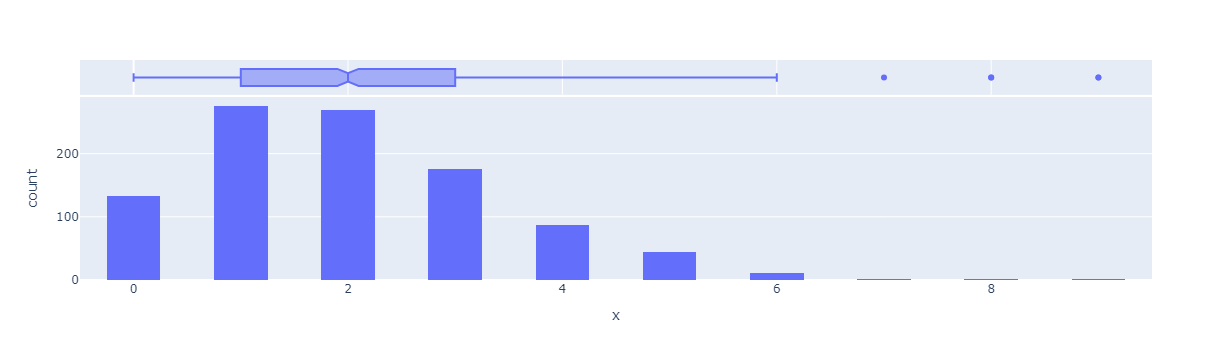

In [61]:
# YOUR CODE HERE

### 1.4.3. Перемешивание и выборка

In [82]:
arr = np.arange(10).reshape(-1, 5)
arr
res = rng.shuffle(arr, axis=1)
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

array([[2, 4, 0, 1, 3],
       [7, 9, 5, 6, 8]])

In [83]:
arr = np.arange(20).reshape(-1, 5)
new_arr = rng.permutation(arr, axis=1)
new_arr

array([[ 2,  4,  3,  0,  1],
       [ 7,  9,  8,  5,  6],
       [12, 14, 13, 10, 11],
       [17, 19, 18, 15, 16]])

In [77]:
arr = np.arange(20).reshape(-1, 5)
arr
rng.choice(arr, size=3)
rng.choice(arr, size=3, replace=False)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

array([[15, 16, 17, 18, 19],
       [ 0,  1,  2,  3,  4],
       [15, 16, 17, 18, 19]])

array([[15, 16, 17, 18, 19],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

<a id = "2"></a>
# 2. Pandas

**Pandas** - библиотека Python для обработки и анализа данных. Она предоставляет специальные структуры данных и операции для манипулирования числовыми (и не только) таблицами и временными рядами.

**Полезные ссылки:**

- [pandas](https://pandas.pydata.org/)
- [pandas starter's guide](https://pythonist.ru/pandas-tutorial/)
- [pandas tutorial](https://www.geeksforgeeks.org/pandas-tutorial)
- [pandas challenges](https://pandaspractice.com/)

In [2]:
import os
import numpy as np
import pandas as pd

# Показывать несколько выводов в одной клетке. Улучшает читаемость и удобство понимания
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<a id="2.0"></a>
## 2.0. Установка

In [3]:
pip install pandas==2.2.*

Note: you may need to restart the kernel to use updated packages.


<a id="2.1"></a>
## 2.1. Series

### 2.1.0. Создание и атрибуты

In [108]:
rng = np.random.default_rng(seed=712)  # Задали сид
s = pd.Series(rng.standard_normal(size=5), index=['a', 'b', 'c', 'd', 'e'])
s  # Вся серия
s.values  # Значения
s.index  # Столбцы (индексы)

a   -1.759699
b   -0.060606
c    0.101317
d    0.378296
e    1.617290
dtype: float64

array([-1.75969881, -0.06060586,  0.10131665,  0.37829567,  1.61729001])

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [112]:
s.is_monotonic_decreasing  # Значения уменьшаются
s.is_monotonic_increasing  # Значения увеличиваются
s.is_unique  # Все значения уникальны
s.shape  # Размерность Серии, всегда будет (n,)

False

True

True

(5,)

In [113]:
s.iloc[4]
s["e"]
s.loc["e"]

1.6172900091923579

1.6172900091923579

1.6172900091923579

In [114]:
s[['b','e']]

b   -0.060606
e    1.617290
dtype: float64

### 2.1.1. Преобразования

In [137]:
rng = np.random.default_rng(seed=712)  # Задали сид
s = pd.Series(rng.standard_normal(size=5), index=['a', 'b', 'c', 'd', 'e'])
s  # Вся серия
s.abs()  # Модуль

a   -1.759699
b   -0.060606
c    0.101317
d    0.378296
e    1.617290
dtype: float64

a    1.759699
b    0.060606
c    0.101317
d    0.378296
e    1.617290
dtype: float64

In [138]:
s + s.iloc[2:]  # Сложение происходит по индексу

a         NaN
b         NaN
c    0.202633
d    0.756591
e    3.234580
dtype: float64

In [140]:
s.mod(1)  # Взятие чисел по модулю
s.mean()
s.std()
np.cos(s)

a    0.240301
b    0.939394
c    0.101317
d    0.378296
e    0.617290
dtype: float64

0.05531953119705255

1.2097428819756284

a   -0.187781
b    0.998164
c    0.994872
d    0.929295
e   -0.046477
dtype: float64

### 2.1.2. Фильтрация

In [121]:
rng = np.random.default_rng(seed=712)  # Задали сид
s = pd.Series(rng.standard_normal(size=5), index=['a', 'b', 'c', 'd', 'e'])
s  # Вся серия
s.between(0, 1)  # Маска по принадлежности значений промежутку
s[s.between(0, 1)]  # Применение маски

a   -1.759699
b   -0.060606
c    0.101317
d    0.378296
e    1.617290
dtype: float64

a    False
b    False
c     True
d     True
e    False
dtype: bool

c    0.101317
d    0.378296
dtype: float64

In [124]:
s[s<1]  # Маска по сравнению
s[s.round() == 0]  # Маска по равенству

a   -1.759699
b   -0.060606
c    0.101317
d    0.378296
dtype: float64

b   -0.060606
c    0.101317
d    0.378296
dtype: float64

In [143]:
s = pd.Series([0, None, np.NaN, np.inf], index=['a', 'b', 'c', 'd'])
s
s[s.isna()]  # Получение всех NaN значений
s[s.isnull()]  # Аналог верхнего

s[s.notna()]  # Получение всех не NaN значений
s[s.notnull()]  # Аналог верхнего

a    0.0
b    NaN
c    NaN
d    inf
dtype: float64

b   NaN
c   NaN
dtype: float64

b   NaN
c   NaN
dtype: float64

a    0.0
d    inf
dtype: float64

a    0.0
d    inf
dtype: float64

In [144]:
s = pd.Series([0, None, np.NaN, np.inf], index=['a', 'b', 'c', 'd'])
s
s.dropna()  # Получение новой серии с выкидыванием всех NaN значений

a    0.0
b    NaN
c    NaN
d    inf
dtype: float64

a    0.0
d    inf
dtype: float64

<a id="2.2"></a>
## 2.2. DataFrame

### 2.2.0. Создание и чтение

Вид DataFrame - колонки из серий, то есть таблица  

<img src=data/pandas_df.png></img>  
<img src=data/pandas_df2.png></img>

In [145]:
data = {'color' : ['blue', 'green', 'yellow', 'red', 'white'],
        'object' : ['ball', 'pen', 'pencil', 'paper', 'mug'],
        'price' : [1.2, 1.0, 0.6, 0.9, 1.7]}
df = pd.DataFrame(data)
df

,color,object,price
0,blue,ball,1.2
1,green,pen,1.0
2,yellow,pencil,0.6
3,red,paper,0.9
4,white,mug,1.7


In [152]:
rng = np.random.default_rng()
data = rng.standard_normal(size=(10, 4))
df = pd.DataFrame(data, columns = ["a", "b", "c", "d"], index=[chr(i) for i in range(1000, 1010)])
df

,a,b,c,d
Ϩ,0.560188,0.575567,-1.597875,0.947536
ϩ,-1.321181,-0.056002,0.757153,-0.939129
Ϫ,0.376315,-1.052112,0.231827,0.666287
ϫ,-2.269064,1.436269,-0.830523,-0.540042
Ϭ,1.261580,-0.805608,0.511625,0.651746
ϭ,1.619217,-0.380609,-1.178183,-0.384944
Ϯ,-0.916046,0.767819,-1.262606,-1.415617
ϯ,1.896788,0.266413,0.421664,0.283069
ϰ,0.930934,0.104206,0.466579,2.199784
ϱ,1.722571,0.279835,0.292723,0.742451


In [158]:
rng = np.random.default_rng()
data = rng.standard_normal(size=(5, 2))
df = pd.DataFrame(data, columns = ["a", "b"], index=["x", "y", "x", "x", "z"])
df
df.loc["x"]

,a,b
x,0.397838,-0.580578
y,1.007431,0.699808
x,-0.255131,1.050475
x,-0.738390,-0.166486
z,0.211323,-1.056480


,a,b
x,0.397838,-0.580578
x,-0.255131,1.050475
x,-0.738390,-0.166486


In [159]:
df = pd.read_csv("https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Titanic.csv")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [173]:
df = pd.read_csv("data/Titanic.csv", index_col=[1, 0], usecols=["survived", "ticket", "pclass", "sex", "age", "boat"], sep=",")
df

sex    age  ticket boat
survived pclass                            
1        1       female  29.00   24160    2
         1         male   0.92  113781   11
0        1       female   2.00  113781  NaN
         1         male  30.00  113781  NaN
         1       female  25.00  113781  NaN
...                 ...    ...     ...  ...
         3       female  14.50    2665  NaN
         3       female    NaN    2665  NaN
         3         male  26.50    2656  NaN
         3         male  27.00    2670  NaN
         3         male  29.00  315082  NaN

[1309 rows x 4 columns]

### 2.2.1. Основные методы для просмотра

In [51]:
df = pd.read_csv("data/Titanic.csv", index_col=[1, 0], usecols=["survived", "ticket", "pclass", "sex", "age", "boat"], sep=",")
df.shape
df.columns
df.index

(1309, 4)

Index(['sex', 'age', 'ticket', 'boat'], dtype='object')

MultiIndex([(1, 1),
            (1, 1),
            (0, 1),
            (0, 1),
            (0, 1),
            (1, 1),
            (1, 1),
            (0, 1),
            (1, 1),
            (0, 1),
            ...
            (0, 3),
            (1, 3),
            (0, 3),
            (0, 3),
            (0, 3),
            (0, 3),
            (0, 3),
            (0, 3),
            (0, 3),
            (0, 3)],
           names=['survived', 'pclass'], length=1309)

In [42]:
df.head(3)
df.tail(3)
df.sample(5, weights='age')

sex    age  ticket boat
survived pclass                            
1        1       female  29.00   24160    2
         1         male   0.92  113781   11
0        1       female   2.00  113781  NaN

sex   age  ticket boat
survived pclass                         
0        3       male  26.5    2656  NaN
         3       male  27.0    2670  NaN
         3       male  29.0  315082  NaN

sex   age  ticket boat
survived pclass                           
0        2         male  42.0  211535  NaN
1        3       female  63.0    4134   15
         1       female  39.0   13507   11
         1       female  19.0   11752    5
0        3       female  36.0  350405  NaN

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, (1, 1) to (0, 3)
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     1309 non-null   object 
 1   age     1046 non-null   float64
 2   ticket  1309 non-null   object 
 3   boat    486 non-null    object 
dtypes: float64(1), object(3)
memory usage: 43.8+ KB


In [44]:
df.describe()
df.describe(percentiles=[0, 0.3, 0.5, 0.851, 1], include="all").T

,age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


,count,unique,top,freq,mean,std,min,0%,30%,50%,85.1%,100%,max
sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,0.17,22.0,28.0,45.0,80.0,80.0
ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
boat,486,27,13,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
res = pd.crosstab(df['sex'], df['age']).T  # Получение количества совпадений пар значений
res  
res[(res['female'] > 0) & (res['male'] > 0)]  # Отсев по ненулевому  количеству в каждом из значений строки
res[res.apply(lambda x: all(x), axis=1)]  # То же самое, но через применение функции к df

sex,female,male
age,,
0.17,1,0
0.33,0,1
0.42,0,1
0.67,0,1
0.75,2,1
...,...,...
70.50,0,1
71.00,0,2
74.00,0,1


sex,female,male
age,,
0.75,2,1
0.92,1,1
1.00,5,5
2.00,7,5
3.00,3,4
...,...,...
59.00,1,2
60.00,4,3
62.00,1,4


sex,female,male
age,,
0.75,2,1
0.92,1,1
1.00,5,5
2.00,7,5
3.00,3,4
...,...,...
59.00,1,2
60.00,4,3
62.00,1,4


### 2.2.2. Сортировка

In [45]:
df = pd.read_csv("data/Titanic.csv", index_col=[1, 0], usecols=["survived", "ticket", "pclass", "sex", "name"], sep=",")
df
df.sort_index(kind='mergesort')

name     sex  \
survived pclass                                                            
1        1                         Allen, Miss. Elisabeth Walton  female   
         1                        Allison, Master. Hudson Trevor    male   
0        1                          Allison, Miss. Helen Loraine  female   
         1                  Allison, Mr. Hudson Joshua Creighton    male   
         1       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
...                                                          ...     ...   
         3                                  Zabour, Miss. Hileni  female   
         3                                 Zabour, Miss. Thamine  female   
         3                             Zakarian, Mr. Mapriededer    male   
         3                                   Zakarian, Mr. Ortin    male   
         3                                    Zimmerman, Mr. Leo    male   

                 ticket  
survived pclass          
1        1        24160  
         1       113781  
0        1       113781  
         1       113781  
         1       113781  
...                 ...  
         3         2665  
         3         2665  
         3         2656  
         3         2670  
         3       315082  

[1309 rows x 3 columns]

name     sex  \
survived pclass                                                            
0        1                          Allison, Miss. Helen Loraine  female   
         1                  Allison, Mr. Hudson Joshua Creighton    male   
         1       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
         1                                Andrews, Mr. Thomas Jr    male   
         1                               Artagaveytia, Mr. Ramon    male   
...                                                          ...     ...   
1        3                                Turkula, Mrs. (Hedwig)  female   
         3                                  Vartanian, Mr. David    male   
         3       Whabee, Mrs. George Joseph (Shawneene Abi-Saab)  female   
         3                      Wilkes, Mrs. James (Ellen Needs)  female   
         3               Yasbeck, Mrs. Antoni (Selini Alexander)  female   

                   ticket  
survived pclass            
0        1         113781  
         1         113781  
         1         113781  
         1         112050  
         1       PC 17609  
...                   ...  
1        3           4134  
         3           2658  
         3           2688  
         3         363272  
         3           2659  

[1309 rows x 3 columns]

In [12]:
df.sort_values("ticket", ascending=False)

name     sex  \
survived pclass                                                              
0        1                            Crosby, Capt. Edward Gifford    male   
1        1                                 Crosby, Miss. Harriet R  female   
0        2                                      Harris, Mr. Walter    male   
         1                             Chaffee, Mr. Herbert Fuller    male   
1        1       Chaffee, Mrs. Herbert Fuller (Carrie Constance...  female   
...                                                            ...     ...   
         1                  Taussig, Mrs. Emil (Tillie Mandelbaum)  female   
0        1                                       Taussig, Mr. Emil    male   
1        1                                   Maioni, Miss. Roberta  female   
         1                                    Cherry, Miss. Gladys  female   
         1       Rothes, the Countess. of (Lucy Noel Martha Dye...  female   

                      ticket  
survived pclass               
0        1         WE/P 5735  
1        1         WE/P 5735  
0        2         W/C 14208  
         1       W.E.P. 5734  
1        1       W.E.P. 5734  
...                      ...  
         1            110413  
0        1            110413  
1        1            110152  
         1            110152  
         1            110152  

[1309 rows x 3 columns]

### 2.2.3. Индексация, срезы и маски

In [17]:
df = pd.read_csv("data/Titanic.csv", index_col=[1, 0], usecols=["survived", "ticket", "pclass", "sex", "age", "boat"], sep=",")
df["sex"]
df[["sex", "age"]]

survived  pclass
1         1         female
          1           male
0         1         female
          1           male
          1         female
                     ...  
          3         female
          3         female
          3           male
          3           male
          3           male
Name: sex, Length: 1309, dtype: object

sex    age
survived pclass               
1        1       female  29.00
         1         male   0.92
0        1       female   2.00
         1         male  30.00
         1       female  25.00
...                 ...    ...
         3       female  14.50
         3       female    NaN
         3         male  26.50
         3         male  27.00
         3         male  29.00

[1309 rows x 2 columns]

In [18]:
df.loc[0]  # Выбираем все строки когда survived == 0
df.loc[[0, 1]]  # Выбираем все строки когда survived in [0, 1]
df.loc[(0, 1)]  # Выбираем все строки когда survived == 0, pclass == 1

,sex,age,ticket,boat
pclass,,,,
1,female,2.0,113781,NaN
1,male,30.0,113781,NaN
1,female,25.0,113781,NaN
1,male,39.0,112050,NaN
1,male,71.0,PC 17609,NaN
...,...,...,...,...
3,female,14.5,2665,NaN
3,female,NaN,2665,NaN
3,male,26.5,2656,NaN


sex   age    ticket   boat
survived pclass                               
0        1       female   2.0    113781    NaN
         1         male  30.0    113781    NaN
         1       female  25.0    113781    NaN
         1         male  39.0    112050    NaN
         1         male  71.0  PC 17609    NaN
...                 ...   ...       ...    ...
1        3       female  63.0      4134     15
         3         male  22.0      2658  13 15
         3       female  38.0      2688      C
         3       female  47.0    363272    NaN
         3       female  15.0      2659    NaN

[1309 rows x 4 columns]

C:\Users\kitro\AppData\Local\Temp\ipykernel_12124\237073859.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[(0, 1)]  # Выбираем все строки когда survived == 0, pclass == 1


sex   age    ticket boat
survived pclass                             
0        1       female   2.0    113781  NaN
         1         male  30.0    113781  NaN
         1       female  25.0    113781  NaN
         1         male  39.0    112050  NaN
         1         male  71.0  PC 17609  NaN
...                 ...   ...       ...  ...
         1         male  50.0    113503  NaN
         1         male  27.0    113503  NaN
         1         male  51.0  PC 17597  NaN
         1         male   NaN    113510  NaN
         1         male  62.0    113807  NaN

[123 rows x 4 columns]

In [20]:
df.loc[[0], ["age"]]
df.loc[[0], ["ticket", "age"]]
df.loc[[0], "age":"boat"]

age
survived pclass      
0        1        2.0
         1       30.0
         1       25.0
         1       39.0
         1       71.0
...               ...
         3       14.5
         3        NaN
         3       26.5
         3       27.0
         3       29.0

[809 rows x 1 columns]

ticket   age
survived pclass                
0        1         113781   2.0
         1         113781  30.0
         1         113781  25.0
         1         112050  39.0
         1       PC 17609  71.0
...                   ...   ...
         3           2665  14.5
         3           2665   NaN
         3           2656  26.5
         3           2670  27.0
         3         315082  29.0

[809 rows x 2 columns]

age    ticket boat
survived pclass                     
0        1        2.0    113781  NaN
         1       30.0    113781  NaN
         1       25.0    113781  NaN
         1       39.0    112050  NaN
         1       71.0  PC 17609  NaN
...               ...       ...  ...
         3       14.5      2665  NaN
         3        NaN      2665  NaN
         3       26.5      2656  NaN
         3       27.0      2670  NaN
         3       29.0    315082  NaN

[809 rows x 3 columns]

In [23]:
df.loc[(0,2), ("age", "ticket")]  # Комбинация мультииндекса и выбора столбцов

C:\Users\kitro\AppData\Local\Temp\ipykernel_12124\672734431.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc[(0,2), ("age", "ticket")]  # Комбинация мультииндекса и выбора столбцов


age         ticket
survived pclass                     
0        2       30.0      P/PP 3381
         2       30.0         248744
         2       18.0         231945
         2       25.0     C.A. 34050
         2       34.0         226875
...               ...            ...
         2       27.0         228414
         2       36.0     C.A. 34651
         2       66.0     C.A. 24579
         2        NaN  SC/PARIS 2159
         2       24.0         248747

[158 rows x 2 columns]

In [275]:
df.iloc[0]
df.iloc[:3]

sex       female
age         29.0
ticket     24160
boat           2
Name: (1, 1), dtype: object

sex    age  ticket boat
survived pclass                            
1        1       female  29.00   24160    2
         1         male   0.92  113781   11
0        1       female   2.00  113781  NaN

In [28]:
new_df = df.head().copy()
new_df
new_df.loc[0] = [[1, 1, 2, 3] for _ in range(3)]
new_df

sex    age  ticket boat
survived pclass                            
1        1       female  29.00   24160    2
         1         male   0.92  113781   11
0        1       female   2.00  113781  NaN
         1         male  30.00  113781  NaN
         1       female  25.00  113781  NaN

sex    age  ticket boat
survived pclass                            
1        1       female  29.00   24160    2
         1         male   0.92  113781   11
0        1            1   1.00       2    3
         1            1   1.00       2    3
         1            1   1.00       2    3

In [29]:
df["sex"]=='male'  # Маска
df[df["sex"]=='male']  # Её применения для нахождения только нужных строк

survived  pclass
1         1         False
          1          True
0         1         False
          1          True
          1         False
                    ...  
          3         False
          3         False
          3          True
          3          True
          3          True
Name: sex, Length: 1309, dtype: bool

sex    age    ticket boat
survived pclass                            
1        1       male   0.92    113781   11
0        1       male  30.00    113781  NaN
1        1       male  48.00     19952    3
0        1       male  39.00    112050  NaN
         1       male  71.00  PC 17609  NaN
...               ...    ...       ...  ...
         3       male    NaN      2647  NaN
         3       male    NaN      2627  NaN
         3       male  26.50      2656  NaN
         3       male  27.00      2670  NaN
         3       male  29.00    315082  NaN

[843 rows x 4 columns]

### 2.2.4. Работа с пропущенными данными

In [295]:
df = pd.read_csv("data/Titanic.csv", usecols=["sex", "age", "boat"])
df.sample(7)

,sex,age,boat
128,male,47.0,NaN
914,male,33.0,NaN
347,male,42.0,NaN
190,female,21.0,10
1308,male,29.0,NaN
144,female,25.0,5
978,male,27.0,15


In [298]:
blank_na_df = pd.read_csv("data/Titanic.csv", usecols=["sex", "age", "boat"], keep_default_na=False)
blank_na_df.sample(7)

,sex,age,boat
1087,male,28,
739,male,44,
733,male,9,2
882,male,,
441,female,55,13
559,female,20,11
14,male,80,B


In [299]:
pd.notna(df.iloc[882])
pd.notna(blank_na_df.iloc[882])

sex      True
age     False
boat    False
Name: 882, dtype: bool

sex     True
age     True
boat    True
Name: 882, dtype: bool

In [30]:
df = pd.read_csv("data/Titanic.csv", usecols=["sex", "cabin", "boat"])
no_na_df = df.dropna()
no_na_df.head()
all(no_na_df.notna())

,sex,cabin,boat
0,female,B5,2
1,male,C22 C26,11
5,male,E12,3
6,female,D7,10
8,female,C101,D


True

In [303]:
df = pd.read_csv("data/Titanic.csv", usecols=["sex", "cabin", "boat"])
ff_df = df.ffill()
df.head(10)
ff_df.head(10)

,sex,cabin,boat
0,female,B5,2
1,male,C22 C26,11
2,female,C22 C26,NaN
3,male,C22 C26,NaN
4,female,C22 C26,NaN
5,male,E12,3
6,female,D7,10
7,male,A36,NaN
8,female,C101,D
9,male,NaN,NaN


,sex,cabin,boat
0,female,B5,2
1,male,C22 C26,11
2,female,C22 C26,11
3,male,C22 C26,11
4,female,C22 C26,11
5,male,E12,3
6,female,D7,10
7,male,A36,10
8,female,C101,D
9,male,C101,D


In [304]:
df = pd.read_csv("data/Titanic.csv", usecols=["sex", "cabin", "boat"])
ff_df = df.bfill()
df.head(10)
ff_df.head(10)

,sex,cabin,boat
0,female,B5,2
1,male,C22 C26,11
2,female,C22 C26,NaN
3,male,C22 C26,NaN
4,female,C22 C26,NaN
5,male,E12,3
6,female,D7,10
7,male,A36,NaN
8,female,C101,D
9,male,NaN,NaN


,sex,cabin,boat
0,female,B5,2
1,male,C22 C26,11
2,female,C22 C26,3
3,male,C22 C26,3
4,female,C22 C26,3
5,male,E12,3
6,female,D7,10
7,male,A36,D
8,female,C101,D
9,male,C62 C64,4


In [39]:
df = pd.read_csv("data/Titanic.csv", usecols=["fare"])
interpolated_df = df.interpolate(method="linear")
df[df["fare"].isna()]
df.iloc[1224:1227]
interpolated_df.iloc[1224:1227]

,fare
1225,NaN


,fare
1224,8.0500
1225,NaN
1226,7.8958


,fare
1224,8.0500
1225,7.9729
1226,7.8958


In [305]:
value_df = df.fillna("Filled")
df.head(10)
value_df.head(10)

,sex,cabin,boat
0,female,B5,2
1,male,C22 C26,11
2,female,C22 C26,NaN
3,male,C22 C26,NaN
4,female,C22 C26,NaN
5,male,E12,3
6,female,D7,10
7,male,A36,NaN
8,female,C101,D
9,male,NaN,NaN


,sex,cabin,boat
0,female,B5,2
1,male,C22 C26,11
2,female,C22 C26,Filled
3,male,C22 C26,Filled
4,female,C22 C26,Filled
5,male,E12,3
6,female,D7,10
7,male,A36,Filled
8,female,C101,D
9,male,Filled,Filled


<a id="2.3"></a>
## 2.3. Визуализация

In [91]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [94]:
all_df = pd.read_csv("data/Titanic.csv")
all_df.sample(5)
numurical_columns = all_df.select_dtypes(include=['float64', 'int64']).columns  # Вытаскиваем только колонки типа float и int
numerical_df = pd.read_csv("data/Titanic.csv", usecols=numurical_columns)
numerical_df.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
108,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,4,NaN,NaN
677,3,0,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S,NaN,NaN,"Bulgaria Chicago, IL"
914,3,0,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,347465,7.8542,NaN,S,NaN,NaN,NaN
963,3,0,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S,NaN,NaN,NaN
1208,3,0,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9000,NaN,S,NaN,NaN,NaN


,pclass,survived,age,sibsp,parch,fare,body
1047,3,1,15.0,0,0,7.2250,NaN
1128,3,0,NaN,0,0,7.8958,NaN
470,2,0,35.0,0,0,12.3500,NaN
717,3,0,18.0,1,0,14.4542,NaN
1245,3,0,NaN,0,0,8.0500,NaN


### 2.3.0. Корреляционная матрица 

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


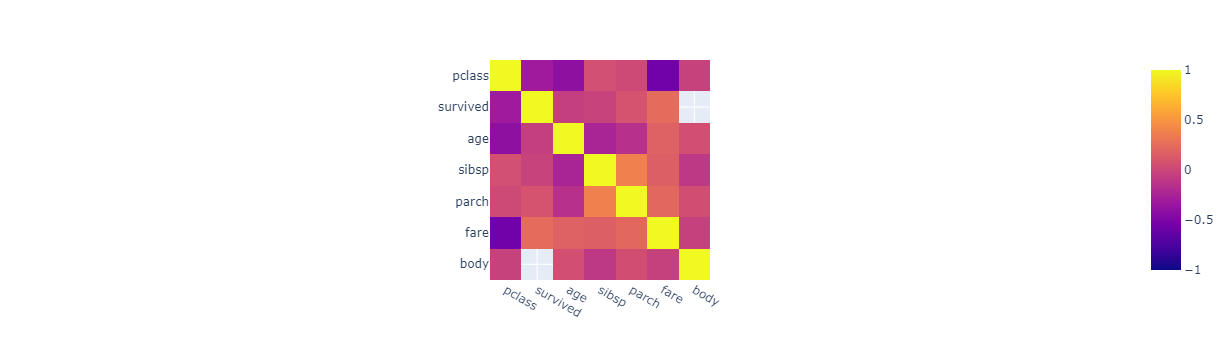

In [93]:
corr_matrix = df.corr()  # Строим корелляционную матрицу
corr_matrix
px.imshow(corr_matrix, range_color=[-1,1])

### 2.3.1. Зависимость между величинами

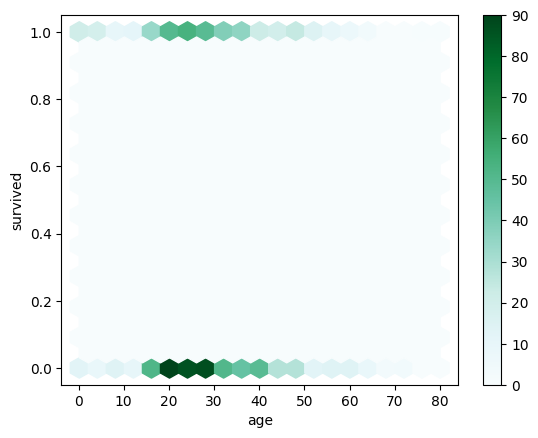

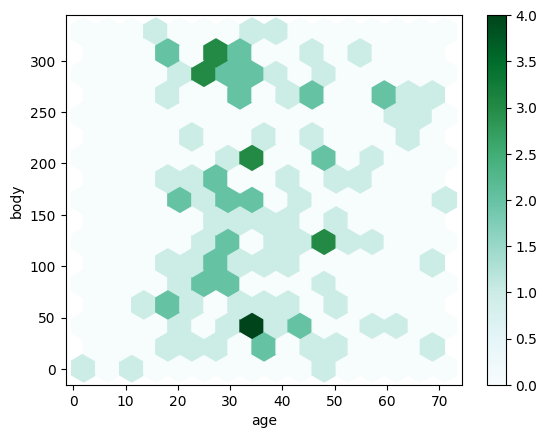

In [166]:
all_df.plot('age', 'survived', kind='hexbin', gridsize=20);
all_df.plot('age', 'body', kind='hexbin', gridsize=15);

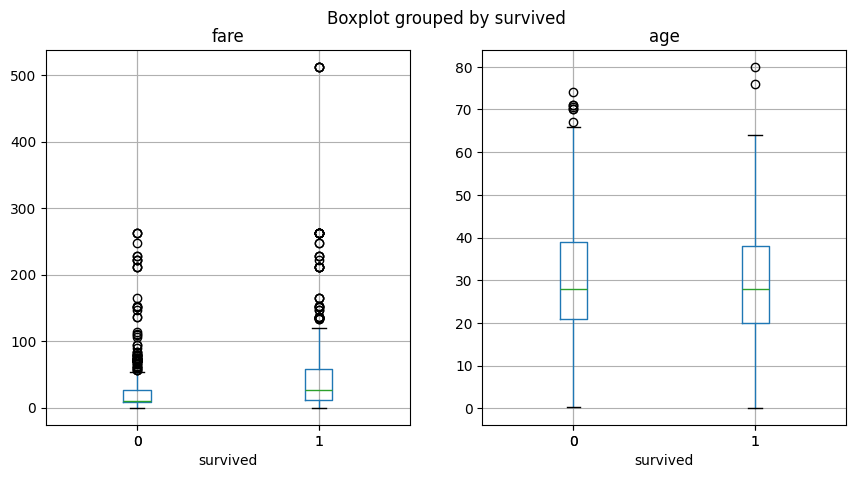

In [128]:
numerical_df.boxplot(column=["fare", 'age'], by='survived', layout=(1,2), figsize=(10,5), sharey=False);

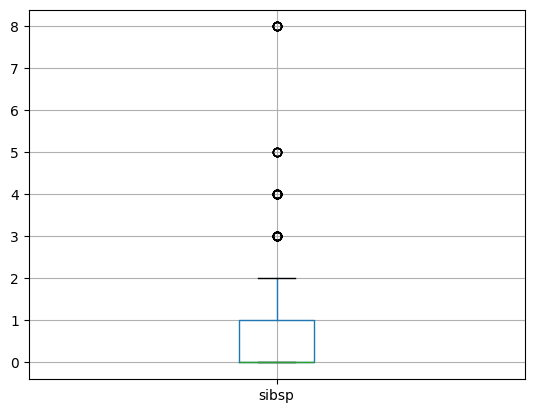

In [140]:
all_df.boxplot(column=['sibsp']);

### 2.3.2. Гистограмма значений

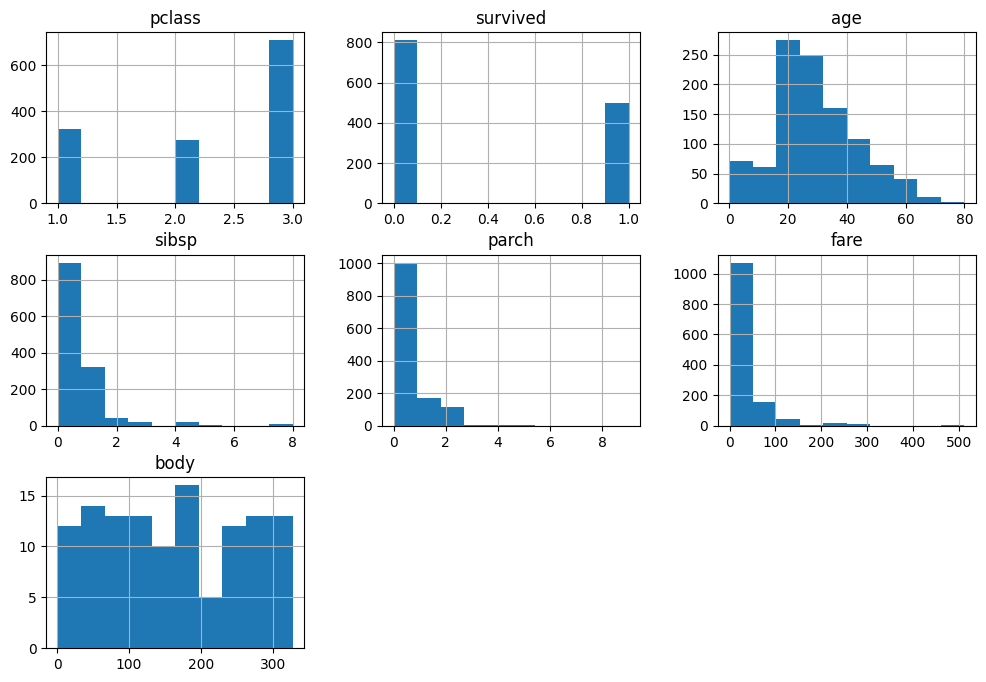

In [123]:
all_df.hist(figsize=(12,8));

### 2.3.3. Круговая диаграмма

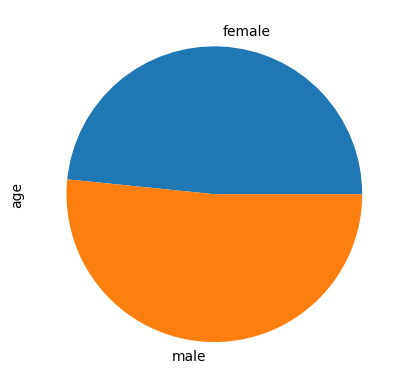

In [219]:
# Лучше строить через Plotly
all_df.groupby("sex")["age"].mean().plot(y='age', kind='pie');

### 2.3.4. Задание 3

По датасету *Titanic* сделать следующие пункты:
1. Найти столбец с самым большим количеством различных значений
2. Найти столбец с самым большим количеством пропущенных значений и предложить методику его заполнения
3. Построить круговую диаграмму соотношения выживших и нет, отдельно для мужчин и женщин

In [ ]:
df = pd.read_csv("data/Titanic.csv")
# YOUR CODE HERE
